# Intervalos de confiança e classificação

In [1]:
import pandas as pd
import numpy as np
import seaborn as srn
import matplotlib.pyplot as plt
from scipy import stats
import math
srn.set()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:
dataset = pd.read_csv('Bases de dados/credit_data.csv')
dataset.dropna(inplace=True)
print(dataset.shape)
dataset.head()

(1997, 5)


,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values
X.shape, y.shape

((1997, 3), (1997,))

In [4]:
resultados_naive_bayes_cv = []
resultados_naive_bayes_cv_300 = []
resultados_logistica_cv = []
resultados_logistica_cv_300 = []
resultados_forest_cv = []
resultados_forest_cv_300 = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv=kfold)
    resultados_naive_bayes_cv_300.append(scores)
    resultados_naive_bayes_cv.append(scores.mean())
    
    logistic = LogisticRegression()
    scores = cross_val_score(logistic, X, y, cv=kfold)
    resultados_logistica_cv_300.append(scores)
    resultados_logistica_cv.append(scores.mean())
    
    forest = RandomForestClassifier()
    scores = cross_val_score(forest, X, y, cv=kfold)
    resultados_forest_cv_300.append(scores)
    resultados_forest_cv.append(scores.mean())

In [5]:
resultados_naive_bayes_cv = np.array( resultados_naive_bayes_cv)
resultados_naive_bayes_cv_300 = np.array(np.asarray(resultados_naive_bayes_cv_300).reshape(-1))
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_logistica_cv_300 = np.array(np.asarray(resultados_logistica_cv_300).reshape(-1))
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_forest_cv_300 = np.array(np.asarray(resultados_forest_cv_300).reshape(-1))

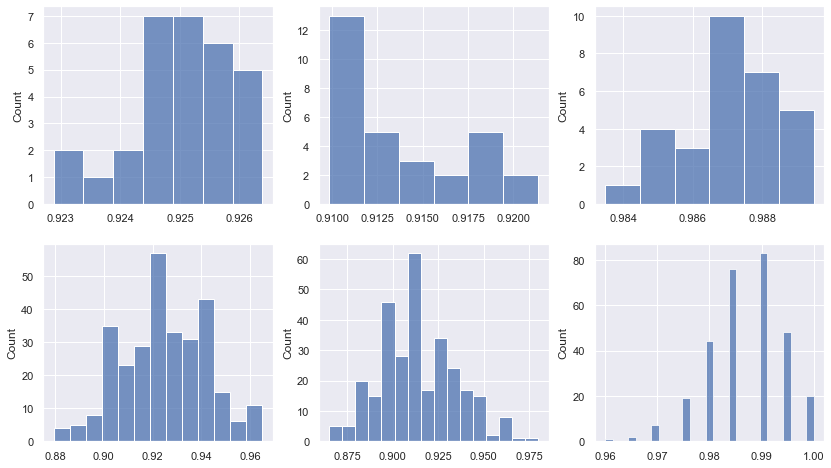

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(14,8))
srn.histplot(resultados_naive_bayes_cv, ax=ax[0,0]);
srn.histplot(resultados_naive_bayes_cv_300, ax=ax[1,0]);
srn.histplot(resultados_logistica_cv, ax=ax[0,1]);
srn.histplot(resultados_logistica_cv_300, ax=ax[1,1] );
srn.histplot(resultados_forest_cv, ax=ax[0,2]);
srn.histplot(resultados_forest_cv_300, ax=ax[1,2]);

In [7]:
print('Média: \n')
print(f'Naive-bayes: {resultados_naive_bayes_cv.mean()}')
print(f'Regressão Logística: {resultados_logistica_cv.mean()}')
print(f'Random Forest: {resultados_forest_cv.mean()}')

Média: 

Naive-bayes: 0.9249359296482411
Regressão Logística: 0.9137817420435511
Random Forest: 0.9870309882747067


In [8]:
print('Variação dos resultados: \n')
print(f'Naive-bayes: {stats.variation(resultados_naive_bayes_cv)*100}')
print(f'Regressão Logística: {stats.variation(resultados_logistica_cv)*100}')
print(f'Random Forest: {stats.variation(resultados_forest_cv)*100}')

Variação dos resultados: 

Naive-bayes: 0.08641071566366061
Regressão Logística: 0.38801026116292653
Random Forest: 0.14552033281783766


## Intervalos de confiança

In [9]:
from scipy.stats import t, norm

### Naive Bayes

In [10]:
intervalos_nb_t = t.interval(0.956,
                             len(resultados_naive_bayes_cv)-1,
                             resultados_naive_bayes_cv.mean(), 
                             stats.sem(resultados_naive_bayes_cv, ddof=0))
intervalos_nb_t

(0.924628654688401, 0.9252432046080812)

In [11]:
# Margem de erro
abs(resultados_naive_bayes_cv.mean() - intervalos_nb_t[1])

0.0003072749598400648

In [12]:
intervalos_nb_n = norm.interval(0.956,
                             resultados_naive_bayes_cv.mean(), 
                             stats.sem(resultados_naive_bayes_cv, ddof=0))
intervalos_nb_n

(0.924642030942784, 0.9252298283536983)

In [13]:
# Margem de erro
abs(resultados_naive_bayes_cv.mean() - intervalos_nb_n[1])

0.0002938987054571518

### Regressão Logística

In [14]:
intervalos_rl_t = t.interval(0.956,
                             len(resultados_logistica_cv)-1,
                             resultados_logistica_cv.mean(), 
                             stats.sem(resultados_logistica_cv, ddof=0))
intervalos_rl_t

(0.9124186235636077, 0.9151448605234945)

In [15]:
# Margem de erro
abs(resultados_logistica_cv.mean() - intervalos_rl_t[1])

0.0013631184799434148

In [16]:
intervalos_rl_n = norm.interval(0.95,
                             resultados_logistica_cv.mean(), 
                             stats.sem(resultados_logistica_cv, ddof=0))
intervalos_rl_n

(0.9125130005283205, 0.9150504835587817)

In [17]:
# Margem de erro
abs(resultados_logistica_cv.mean() - intervalos_rl_n[1])

0.001268741515230598

### Random Forest

In [18]:
intervalos_rf_t = t.interval(0.95,
                             len(resultados_forest_cv)-1,
                             resultados_forest_cv.mean(), 
                             stats.sem(resultados_forest_cv, ddof=0))
intervalos_rf_t

(0.9864946535473565, 0.9875673230020569)

In [19]:
# Margem de erro
abs(resultados_forest_cv.mean() - intervalos_rf_t[1])

0.0005363347273501518

In [20]:
intervalos_rf_n = norm.interval(0.95,
                             resultados_forest_cv.mean(), 
                             stats.sem(resultados_forest_cv, ddof=0))
intervalos_rf_n

(0.9865170133510066, 0.9875449631984068)

In [21]:
# Margem de erro
abs(resultados_forest_cv.mean() - intervalos_rf_n[1])

0.000513974923700089

Temos 95% de confiança de que a média de acertos do Random Forest está no intervalo entre 98.65-98.66 e 98.77-98.78

Testando:

In [22]:
kfold = KFold(n_splits=10, shuffle=True)
random_forest = RandomForestClassifier()
socre = cross_val_score(random_forest, X, y, cv=kfold)
print(scores.mean())

0.9874874371859296


Já mostrou uma valor fora do intervalo!

## Teste de hipótese Z

In [23]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])
print(len(dados))
#dados

100


In [24]:
h0_media = np.mean(dados)
h0_desvio_padrao = np.std(dados)
h0_media, h0_desvio_padrao

(159.25, 13.65)

In [25]:
dados_novos = dados * 1.03

In [26]:
h1_media = np.mean(dados_novos)
h1_desvio_padrao = np.std(dados_novos)
h1_media, h1_desvio_padrao

(164.0275, 14.0595)

In [27]:
H1_n = len(dados_novos)
H0_n = len(dados)
alpha = 0.05

### Teste manual

In [28]:
Z = (h1_media - h0_media) / (h1_desvio_padrao / math.sqrt(H1_n))
Z

3.398058252427187

In [29]:
Z = norm.cdf(Z)
Z

0.9996606701617486

In [30]:
p = 1 - Z
p

0.00033932983825135654

In [31]:
if p < alpha:
    print('Rejeitar hipótese nula')
else:
    print('Rejeita hipótese alternativa')

Rejeitar hipótese nula


### Teste com statsmodels

In [32]:
from statsmodels.stats.weightstats import ztest

In [33]:
_, p = ztest(dados, 
             dados_novos, 
             value = h1_media - h0_media, 
             alternative='larger')
p = 1 - p

In [34]:
if p < alpha:
    print('Rejeitar hipótese nula')
else:
    print('Rejeita hipótese alternativa')

Rejeitar hipótese nula


## Exercício - T student

In [35]:
df = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])
df.shape

(9,)

In [36]:
df_2 = df * 1.02

In [37]:
from scipy.stats import ttest_rel

In [38]:
_, p = ttest_rel(df, df_2)
p

4.072922493930298e-10

In [39]:
alpha = 0.01
if p < alpha:
    print('Rejeitar hipótese nula')
else:
    print('Rejeita hipótese alternativa')

Rejeitar hipótese nula


## Qui Quadrado

In [40]:
from scipy.stats import chi2_contingency

In [41]:
tabela = np.array([[30, 20], [22, 29]])
df_tabela = pd.DataFrame(tabela, 
             columns=['Visão computacional', 'Algoritmos de busca'], 
             index=['Homens', "Mulheres"])
print(df_tabela.shape)
df_tabela

(2, 2)


,Visão computacional,Algoritmos de busca
Homens,30,20
Mulheres,22,29


In [42]:
p = chi2_contingency(tabela)[1]
freq_esperada = chi2_contingency(tabela)[3]
p

0.13458986407421553

In [43]:
alpha = 0.05
if p <= alpha:
    print('Rejeitar hipótese nula')
else:
    print('Rejeitar hipótese alternativa')

Rejeitar hipótese alternativa


Ou seja, não há diferença estatística significativa nesse conjunto de dados (eles não dizem nada).

## Qui quadrado - seleção de atributos

In [54]:
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import chi2

In [44]:
dataset = pd.read_csv('Bases de dados/ad.data', header=None)
print(dataset.shape)
dataset.head()

(3279, 1559)


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [46]:
X = dataset.iloc[:, 0:1558].values
y = dataset.iloc[:, 1558].values
X.shape, y.shape

((3279, 1558), (3279,))

In [47]:
np.unique(y, return_counts=True)

(array(['ad.', 'nonad.'], dtype=object), array([ 459, 2820], dtype=int64))

In [50]:
naive1 = GaussianNB()
naive1.fit(X, y)
previsoes1 = naive1.predict(X)
accuracy_score(previsoes1, y)

0.7813357731015553

In [55]:
selecao = SelectFdr(chi2, alpha=0.01)
X_novo = selecao.fit_transform(X, y)

In [56]:
X_novo.shape, y.shape   # reduziu X de 1558 para 433 atributos

((3279, 433), (3279,))

In [61]:
selecao.pvalues_, len(selecao.pvalues_), np.sum(selecao.pvalues_ <= 0.01)

(array([2.14710304e-268, 0.00000000e+000, 8.98165813e-150, ...,
        6.03353380e-041, 5.63437216e-012, 9.37945775e-002]),
 1558,
 476)

In [66]:
colunas = selecao.get_support()
print(colunas.shape)
indices = np.where(colunas == True)
len(indices[0])

(1558,)


433

In [67]:
naive2 = GaussianNB()
naive2.fit(X_novo, y)
previsoes2 = naive2.predict(X_novo)
accuracy_score(previsoes2, y)

0.970722781335773

Melhorou!

## ANOVA - Análise de variância